#### **This is a sample notebook to get an intuitive sense for running A/B Test and Causal Inference.**

Blog posts for reference: 

+ https://netflixtechblog.com/decision-making-at-netflix-33065fa06481 
    
+ https://netflixtechblog.com/what-is-an-a-b-test-b08cc1b57962
    
+ https://netflixtechblog.com/interpreting-a-b-test-results-false-positives-and-statistical-significance-c1522d0db27a

+ https://netflixtechblog.com/interpreting-a-b-test-results-false-negatives-and-power-6943995cf3a8

+ https://netflixtechblog.com/building-confidence-in-a-decision-8705834e6fd8

**Let's consider an example** where an e-commerce website wants to test whether changing the color of the "Buy Now" button on their product pages influences the click-through rate (CTR). The hypothesis is that a more prominent color will lead to a higher CTR.

Here's how the steps of designing the online experiment could be applied:

**Define Objective:**

Hypothesis: Changing the color of the "Buy Now" button will impact the click-through rate.

**Identify Variables:**

Independent Variable: Button color (e.g., red vs. green).
Dependent Variable: Click-through rate.

**Select Experimental Units:**

Population: All website visitors.
Randomly assign visitors to see either the red or green button.

**Choose a Design:**

A/B Testing: Randomly assign users to two groups (A and B) with different button colors.

**Determine Sample Size:**

Power analysis suggests a sample size of 10,000 users per group to detect a 5% change in CTR with 95% confidence.

**Random Assignment:**

Use a random assignment algorithm to ensure equal distribution of user characteristics in both groups.

**Implement the Experiment:**

Use an A/B testing platform to serve the different button versions to users.
Randomly assign users to the red or green button condition.

**Run the Experiment:**

Launch the experiment and monitor user interactions.

**Collect Data:**

Track user interactions, engagement, clicks, and conversions.
Ensure that data collection mechanisms are functioning correctly.

**Analysis Plan:**

Plan to use a statistical test (e.g., t-test) to compare CTR between the two groups.
Adjust for multiple comparisons if testing additional elements.

**Data Analysis:**

Analyze the collected data using statistical software.
Compare CTR between the red and green button groups.

**Draw Conclusions:**

If there is a statistically significant difference, conclude that the button color influences CTR.
Consider the practical significance and implications for the website.

**Communicate Results:**

Prepare a report or presentation summarizing the experiment, results, and recommendations for website design.
By following these steps, the e-commerce website can systematically test their hypothesis, ensuring that the experiment is well-designed, unbiased, and capable of providing meaningful insights into the impact of button color on user behavior.

In [24]:
import random
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Set a random seed for reproducibility
random.seed(42)

In [25]:
# Create a date range for September 2023
date_range = pd.date_range(start="2023-09-01", end="2023-09-30", freq='D')

# Initialize an empty DataFrame
data = pd.DataFrame(columns=["Date", "Group", "Engagement_(seconds)"])

In [26]:
# Generate data for the control and treatment groups
for date in pd.date_range("2023-09-01", "2023-09-30"):
    control_engagement = random.randint(100, 150)
    treatment_engagement = random.randint(110, 160)

    # Assign the user to a group randomly
    group = random.choice(["Control", "Treatment"])

    # Add the engagement value to the DataFrame using the concat() method
    data = pd.concat([data, pd.DataFrame({"Date": [date], "Group": [group], "Engagement_(seconds)": [control_engagement]})], ignore_index=True)
    data = pd.concat([data, pd.DataFrame({"Date": [date], "Group": [group], "Engagement_(seconds)": [treatment_engagement]})], ignore_index=True)

# Format the "Date" column to display only the date portion (e.g., "2023-09-01")
data["Date"] = pd.to_datetime(data["Date"]).dt.date

/var/folders/d0/gnksqzwn2fn46fjgrkp6045c0000gn/T/ipykernel_9884/1366626444.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame({"Date": [date], "Group": [group], "Engagement_(seconds)": [control_engagement]})], ignore_index=True)


In [27]:
data.head(4)

,Date,Group,Engagement_(seconds)
0,2023-09-01,Control,140
1,2023-09-01,Control,117
2,2023-09-02,Control,147
3,2023-09-02,Control,127


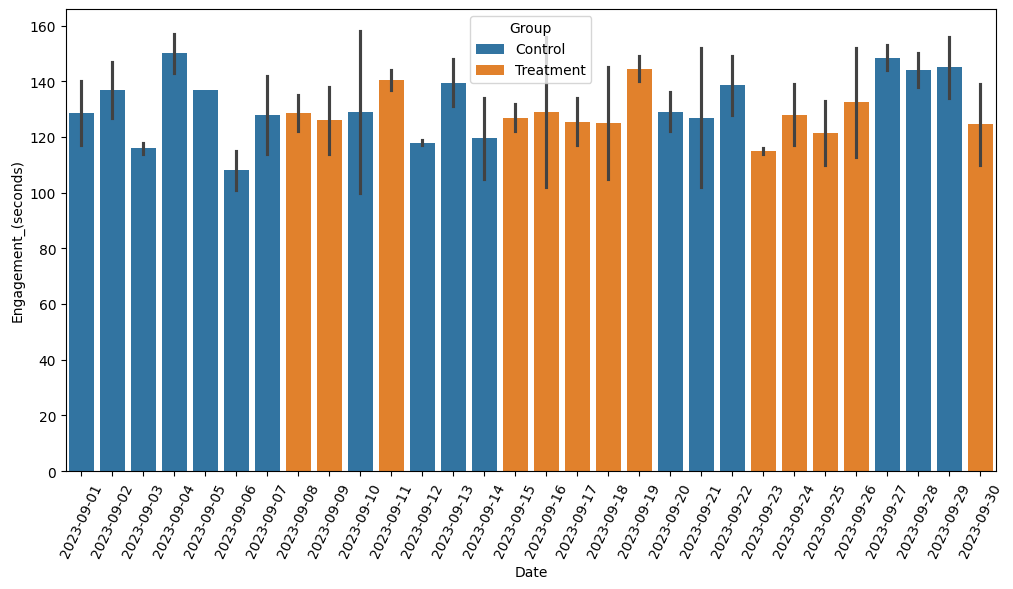

In [28]:
# visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Engagement_(seconds)', hue='Group', data=data)
plt.xticks(rotation=65)
plt.show()


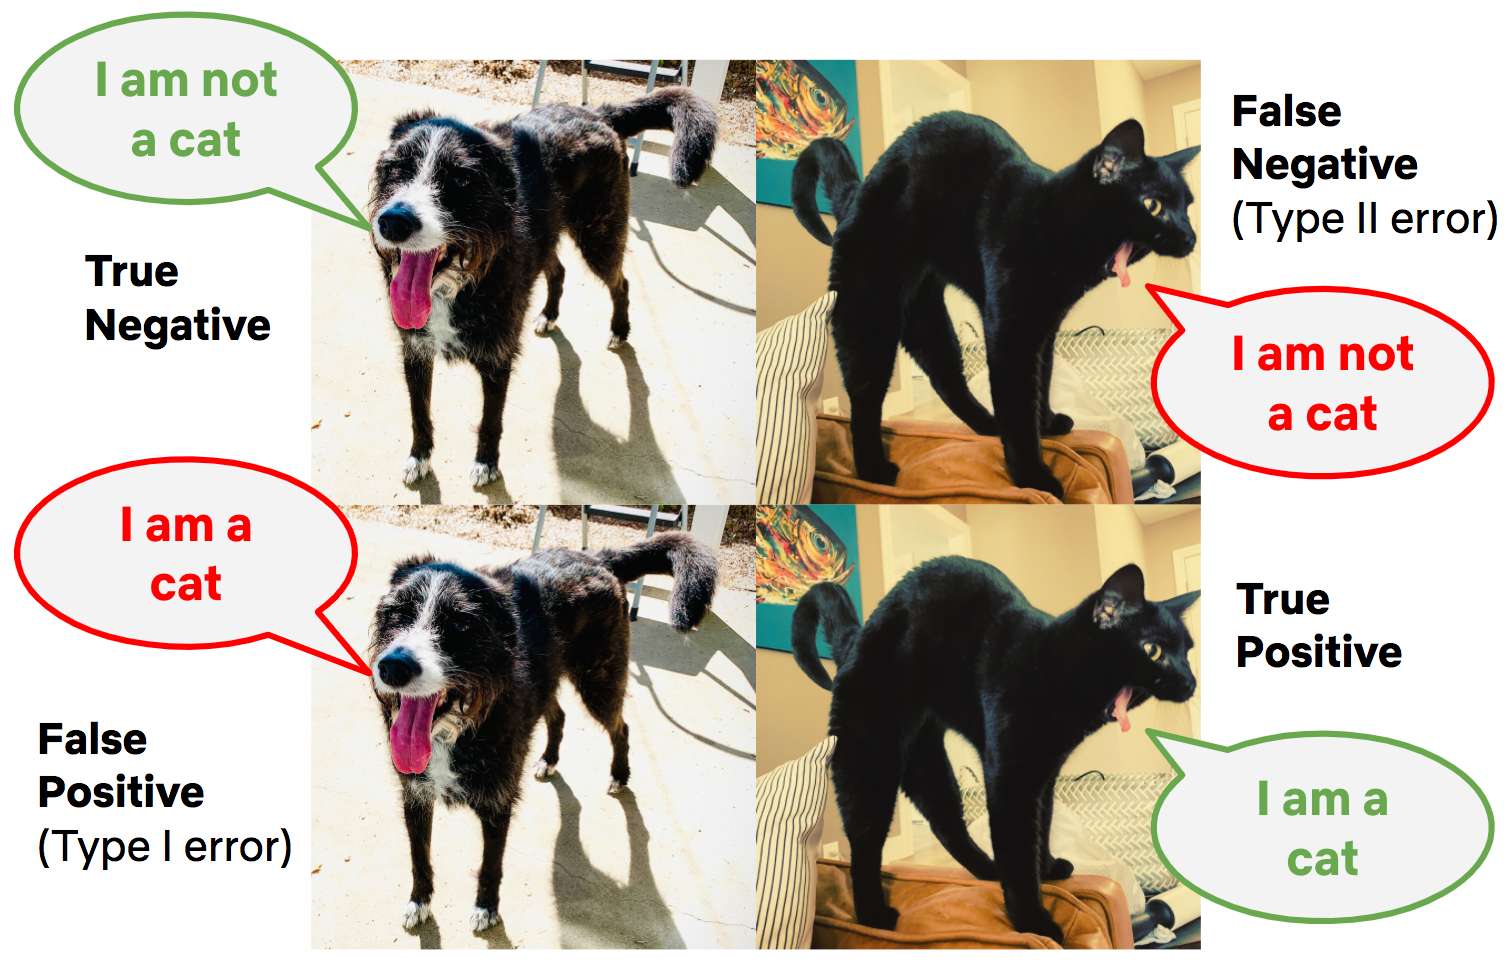

**Null Hypothesis**

First, we’ll assume the coin is fair — this is our “null hypothesis,” which is always a statement of status quo or equality. We then seek compelling evidence against this null hypothesis from the data. 

**False positives and Statistical significance**

By convention, this false positive rate is usually set to 5%: for tests where there is not a meaningful difference between treatment and control, we’ll falsely conclude that there is a “statistically significant” difference 5% of the time. Tests that are conducted with this 5% false positive rate are said to be run at the 5% significance level.

i.e 5% of time, we'll falsely label **non-cat** photos as **cat ones**. 

**p-value**

In [10]:
from scipy import stats

n = 100  # Number of coin flips
p = 0.5  # Probability of getting heads with a fair coin
observed_heads = 55  # Observed number of heads

# Calculate the p-value for a two-sided test <= 45 and >= 55
p_value = 2 * min(stats.binom.cdf(observed_heads, n, p), 1 - stats.binom.cdf(observed_heads - 1, n, p))

print("Two-sided p-value:", p_value)

Two-sided p-value: 0.36820161732669554


This is the mythical p-value: the probability of seeing a result as extreme as our observation, if the null hypothesis were true. In our case, the null hypothesis is that the coin is fair, the observation is **55%** heads in **100 flips**, and the p-value is about **0.36**. 

The interpretation is as follows: were we to repeat, many times, the experiment of flipping a coin 100 times and calculating the fraction of heads, with a fair coin (the null hypothesis is true), in **36%** of those experiments the outcome would feature at least **55%** heads or at least **55%** tails (results at least as unlikely as our actual observation).

Because the p-value **0.36 or 36%** is larger than the **0.05** or **5%** significance level, we conclude that there is not statistically significant evidence that the coin is unfair or we cannot reject the null hypothesis that the coin is fair. 

The interpretation is that, if we were to repeat the experiment of flipping a coin *100* times, **36%** of time, the outcome would feature **55%** heads or tails. If **p-value was < 0.05 or 5% (significance level)**, then we can **reject the null hypothesis that the coin is fair.** 

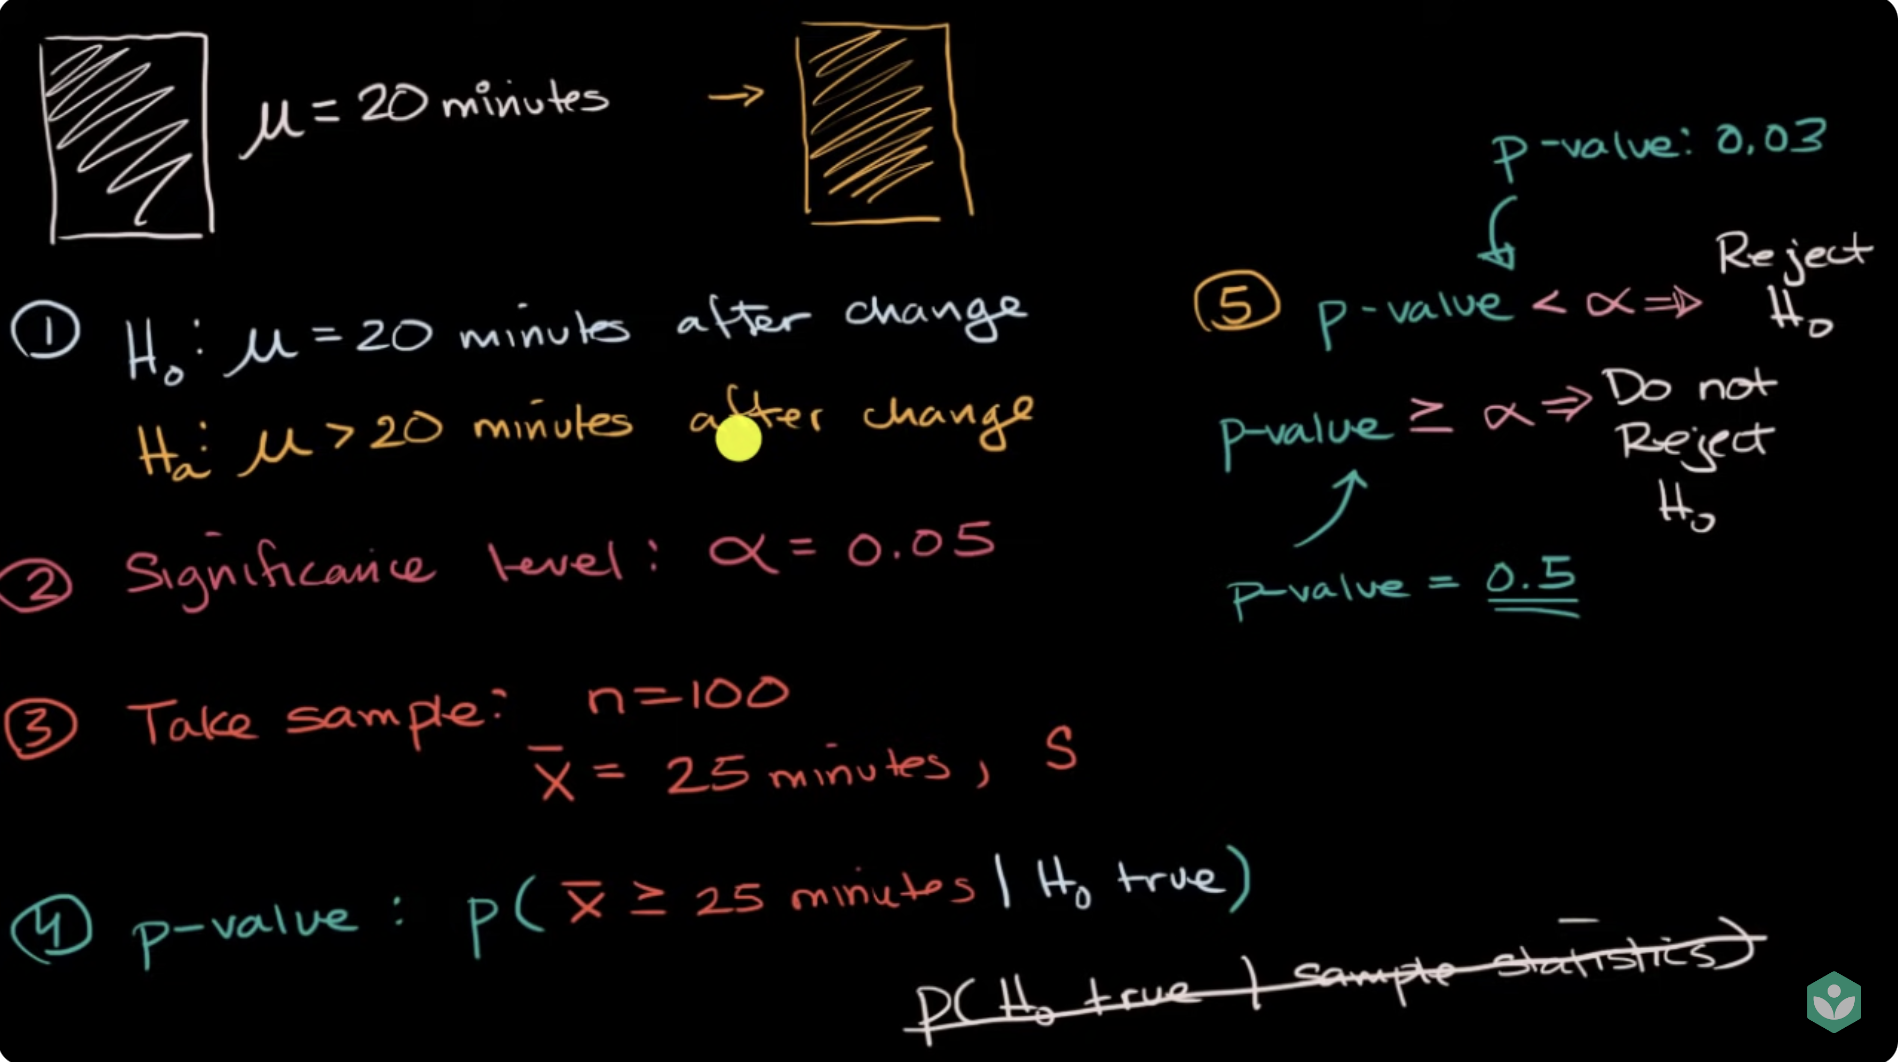

p-value / significance test references: 

https://www.youtube.com/watch?v=KS6KEWaoOOE 



**Confidence Intervals**

A confidence interval is a statistical concept that provides a range of values which is likely to contain the true unknown parameter of interest. It quantifies the uncertainty associated with a point estimate and is used to express the precision or reliability of the estimate. 

The formula is: 

`Confidence Interval = Point Estimate ± Margin of Error`

and 

`Margin of Error = Critical Value × Standard Error`

In [8]:
import math

p_hat = 55 / 100  # Sample proportion
z = 1.96  # Critical value for a 95% confidence interval

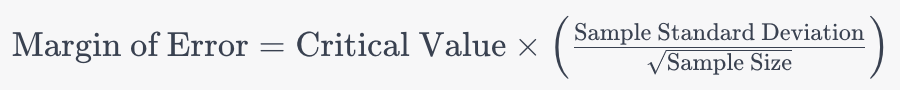 

standard deviation:

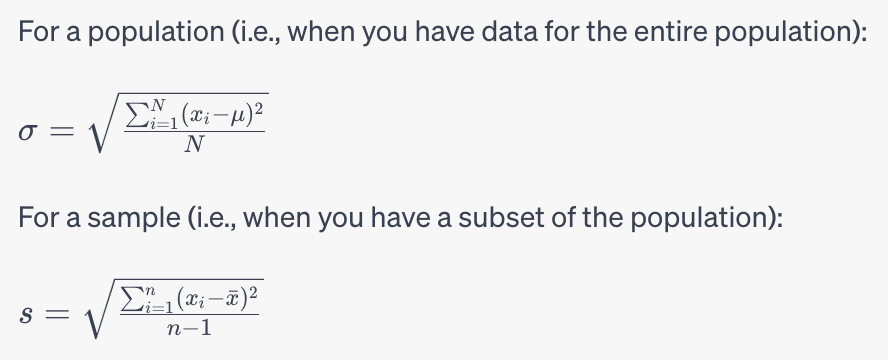

In [11]:
margin_of_error = z * math.sqrt((p_hat * (1 - p_hat)) / n)
    
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

f"95% confidence interval {100*lower_bound:.0f}, {100*upper_bound:.0f}"

'95% confidence interval 45, 65'

The interpretation is that, under repeated experiments, the confidence intervals will cover the true value (here, the actual probability of heads, **55%**) **95%** of the time.

There is an equivalence between the confidence interval and the p-value, and both lead to the same decision: the **95%** confidence interval does not cover the null value if and only if the p-value is less than **0.05**, and in both cases we reject the null hypothesis of no effect.

**False negative and power**

**False negatives** are closely related to the statistical concept of **power**, which gives the **probability of a true positive** given the experimental design and **a true effect of a specific size**. 

The power of a statistical test in the context of A/B tests refers to the probability that the test will correctly reject a false null hypothesis. In other words, it measures the ability of the test to detect a real effect or difference when it truly exists. High power is desirable because it reduces the likelihood of Type II errors (false negatives).

The power of a test is influenced by several factors:

`Effect Size (ES):` The magnitude of the difference or effect in the population. Larger effects are easier to detect, leading to higher power.

`Significance Level (α):` The chosen level of significance, commonly set at 0.05. Lowering the significance level increases the likelihood of Type II errors or the False negative rate, thus reducing the power.

`Sample Size (N):` Increasing the sample size generally increases the power of a test. Larger samples provide more information and reduce variability.

`Variability (Standard Deviation):` Lower variability in the data increases the power of the test. If the data points are less spread out, it's easier to identify a significant difference.

In fact, **power** is simply `1 - the false negative rate`. 

In the cat / dog image above, this is labeling the picture of cat as _"not cat"_

**Effect size:**

Simply put, the larger the effect size — the difference in metric values between Groups A and B — the higher the probability that we’ll be able to correctly detect that difference.

In [14]:
# calculate power of the test
import statsmodels.stats.power as smp

# Simulate coin flips
random.seed(42)  # Set a random seed for reproducibility
n_flips = 100
p_heads_true = 0.64  # True probability of getting heads, if the alternative hypothesis i.e coin is not fair is true. 

# Perform 1000 simulations
n_simulations = 1000
observed_effects = []

for _ in range(n_simulations):
    # Simulate n_flips coin flips with the true probability p_heads_true
    coin_flips = [random.choice(['H', 'T']) for _ in range(n_flips)]
    heads_count = coin_flips.count('H')
    
    # Calculate the observed proportion of heads
    p_heads_observed = heads_count / n_flips
    #print('Probability to heads', p_heads_observed)
    
    # Calculate the effect size (absolute difference)
    effect_size = abs(p_heads_observed - p_heads_true)
    observed_effects.append(effect_size)

# Calculate the mean effect size across simulations
mean_effect_size = sum(observed_effects) / n_simulations

# Perform a power analysis to determine the minimum sample size for a desired power level
desired_power = 0.80 # convention of 80%
alpha = 0.05  # significance level
effect_size = mean_effect_size
n_needed = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=desired_power, alternative='two-sided')

print(f"Mean Effect Size: {100 * mean_effect_size:.2f}%")
print(f"Minimum Sample Size for {desired_power * 100}% Power: {int(n_needed)}")

Mean Effect Size: 13.95%
Minimum Sample Size for 80.0% Power: 807


**t-tests**

In controlled experiments, the t-statistic is a measure used to assess the statistical significance of the difference between two groups, such as a treatment group and a control group. It's commonly employed in hypothesis testing to determine whether an observed effect is likely to be a true effect or if it could have occurred by random chance.

The t-statistic is calculated using the following formula:

`t = Mean difference between groups/Standard error of the mean difference`

Here's a breakdown of the components:

1. **Mean Difference between Groups:** This is the difference in the sample means of the two groups being compared. For example, in the context of a treatment and control group, it would be the difference in the average outcomes or measurements between the two groups.

2. **Standard Error of the Mean Difference:** This represents the standard deviation of the sampling distribution of the mean difference. It takes into account the variability within each group and the sample sizes.

The resulting t-statistic is then compared to a critical value from the t-distribution, which depends on the degrees of freedom (related to the sample sizes of the two groups) and the chosen level of significance (commonly set to 0.05). If the absolute value of the t-statistic is greater than the critical value, it suggests that the observed difference between groups is unlikely to have occurred by random chance alone.

In the context of controlled experiments:

- **Null Hypothesis (\(H_0\)):** The null hypothesis typically posits that there is no true difference or effect between the groups.

- **Alternative Hypothesis (\(H_1\) or \(H_a\)):** The alternative hypothesis proposes that there is a significant difference or effect.

- **Decision Rule:** If the calculated t-statistic falls in the critical region (beyond the critical value), the null hypothesis may be rejected in favor of the alternative hypothesis.

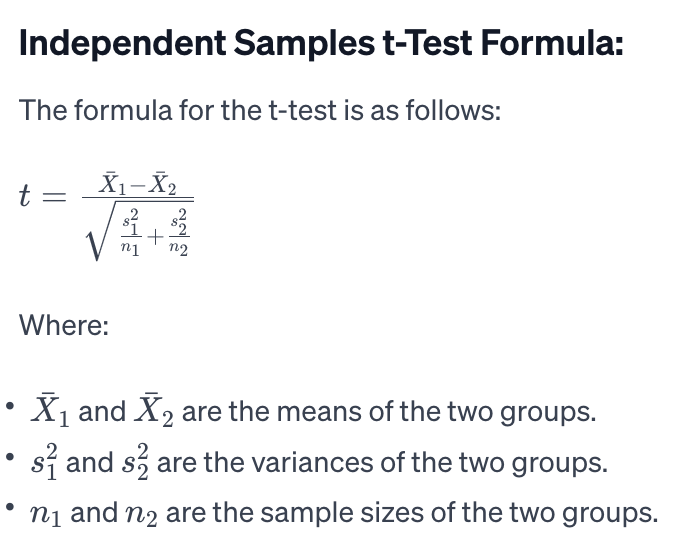 

The t-statistic is widely used in experimental research to quantify the evidence against the null hypothesis and determine whether the observed effects are statistically significant. It's important to note that statistical significance does not imply practical or substantive significance; it only indicates whether the observed differences are likely due to a real effect rather than random variability.

In [21]:
from scipy import stats

# Generate two sets of sample data (replace these with your actual data)
group_a = np.random.normal(loc=20, scale=5, size=30)
group_b = np.random.normal(loc=25, scale=5, size=30)

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(group_a, group_b)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check significance at a 0.05 level
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

T-Statistic: -2.8696181464456405
P-Value: 0.0057252250615676716
Reject the null hypothesis. There is a significant difference.


Appendix:

https://www.youtube.com/watch?v=JNm3M9cqWyc 

https://www.youtube.com/watch?v=hlM7zdf7zwU